In [1]:
import numpy as np
import pandas as pd

In [2]:
standard = pd.read_csv('standardbatting.csv', float_precision = 'round_trip')
standard

,Year,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,Playoff
0,2000,Anaheim Angels,45,27.6,5.33,162,6373,5628,864,1574,...,0.825,105,2659,126,47,47,43,43,1173,0
1,2000,Arizona Diamondbacks,41,30.8,4.89,162,6241,5527,792,1466,...,0.763,88,2373,114,59,61,58,37,1128,0
2,2000,Atlanta Braves,47,30.8,5.00,162,6275,5489,810,1490,...,0.775,95,2353,127,59,87,45,38,1192,1
3,2000,Baltimore Orioles,50,32.1,4.90,162,6238,5549,794,1508,...,0.776,100,2414,148,49,27,54,34,1129,0
4,2000,Boston Red Sox,52,29.3,4.89,162,6371,5630,792,1503,...,0.764,90,2384,115,42,40,48,40,1226,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,2021,St. Louis Cardinals,51,28.5,4.36,162,6001,5351,706,1303,...,0.725,99,2202,99,86,40,44,32,1081,1
656,2021,Tampa Bay Rays,61,27.7,5.29,162,6213,5507,857,1336,...,0.750,110,2362,75,72,6,41,27,1085,1
657,2021,Texas Rangers,54,26.8,3.86,162,5943,5405,625,1254,...,0.670,83,2028,113,58,16,31,10,1007,0
658,2021,Toronto Blue Jays,62,26.8,5.22,162,6070,5476,846,1455,...,0.797,113,2552,112,51,10,35,14,1056,0


In [3]:
standard = standard.loc[standard.Year != 2020, ]



In [4]:
standard.shape

(630, 31)

In [5]:
MLStandard = standard.drop(['Year', 'Tm', 'G'], axis = 1)
MLStandard.head()

,#Bat,BatAge,R/G,PA,AB,R,H,2B,3B,HR,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,Playoff
0,45,27.6,5.33,6373,5628,864,1574,309,34,236,...,0.825,105,2659,126,47,47,43,43,1173,0
1,41,30.8,4.89,6241,5527,792,1466,282,44,179,...,0.763,88,2373,114,59,61,58,37,1128,0
2,47,30.8,5.00,6275,5489,810,1490,274,26,179,...,0.775,95,2353,127,59,87,45,38,1192,1
3,50,32.1,4.90,6238,5549,794,1508,310,22,184,...,0.776,100,2414,148,49,27,54,34,1129,0
4,52,29.3,4.89,6371,5630,792,1503,316,32,167,...,0.764,90,2384,115,42,40,48,40,1226,0


In [6]:
MLStandard = MLStandard.drop(['R', 'H','2B','SH','SF','IBB','LOB','GDP','3B','AB','RBI','SB','BB','HBP','TB','OPS','#Bat'], axis = 1)

In [7]:
MLStandard

,BatAge,R/G,PA,HR,CS,SO,BA,OBP,SLG,OPS+,Playoff
0,27.6,5.33,6373,236,52,1024,0.280,0.352,0.472,105,0
1,30.8,4.89,6241,179,44,975,0.265,0.333,0.429,88,0
2,30.8,5.00,6275,179,56,1010,0.271,0.346,0.429,95,1
3,32.1,4.90,6238,184,65,900,0.272,0.341,0.435,100,0
4,29.3,4.89,6371,167,30,1019,0.267,0.341,0.423,90,0
...,...,...,...,...,...,...,...,...,...,...,...
655,28.5,4.36,6001,198,22,1341,0.244,0.313,0.412,99,1
656,27.7,5.29,6213,222,42,1542,0.243,0.321,0.429,110,1
657,26.8,3.86,5943,167,29,1381,0.232,0.294,0.375,83,0
658,26.8,5.22,6070,262,20,1218,0.266,0.330,0.466,113,0


#1. Logistic Regression Model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [9]:
# 2. use the train_test_split() function to split your data into training and testing data
X = MLStandard.drop('Playoff', axis = 1) # X is our data (independent variables)
Y = MLStandard.Playoff # Y is our target (dependent variable) 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y) # making our training and testing data using tuple assignment

In [10]:
Xtrain.head(3)

,BatAge,R/G,PA,HR,CS,SO,BA,OBP,SLG,OPS+
275,29.8,4.47,6132,184,49,1022,0.258,0.329,0.411,90
362,28.0,4.40,6160,214,29,1315,0.247,0.311,0.417,97
239,27.9,4.15,6201,123,23,1128,0.256,0.325,0.390,89


In [11]:
Xtest.head(3)

,BatAge,R/G,PA,HR,CS,SO,BA,OBP,SLG,OPS+
125,30.1,4.87,6281,235,28,1080,0.268,0.328,0.458,99
63,29.2,4.12,6096,165,48,993,0.246,0.309,0.403,92
643,29.2,5.12,6239,237,17,1408,0.244,0.330,0.429,101


In [12]:
Ytrain.head(3)

275    0
362    1
239    0
Name: Playoff, dtype: int64

In [13]:
Ytest.head(3)

125    0
63     0
643    1
Name: Playoff, dtype: int64

### Starting here are the codes for Logistic Regression ONLY


In [14]:
# 3. Create our Logistic Regression object
logreg_model = LogisticRegression(max_iter = 10000)
# If you get a convergence warning, increase set a high max_iter value until it goes away

In [15]:
# 4. Create our model using .fit()
logreg_model.fit(Xtrain, Ytrain)

LogisticRegression(max_iter=10000)

In [16]:
# 5. Get our predictions of the test data using .predict()
predicted = logreg_model.predict(Xtest)
actual = Ytest

In [17]:
# 6. Get our accuracy score
print(metrics.accuracy_score(predicted, actual))

0.7721518987341772


In [18]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.15)

In [19]:
logreg_model = LogisticRegression(max_iter = 10000)

In [20]:
logreg_model.fit(Xtrain, Ytrain)

LogisticRegression(max_iter=10000)

In [21]:
predicted = logreg_model.predict(Xtest)
actual = Ytest

In [22]:
predicted = logreg_model.predict(Xtest)
actual = Ytest

In [23]:
print(metrics.accuracy_score(predicted, actual))

0.8210526315789474


In [24]:
standard2022 = pd.read_csv('MLB2022.txt')
standard2022.head()

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,Arizona Diamondbacks,51,26.9,4.24,106,3943,3495,449,791,163,...,0.387,0.691,96,1353,58,33,20,26,12,696
1,Atlanta Braves,46,27.9,4.77,109,4091,3712,520,928,202,...,0.442,0.756,107,1642,63,47,0,23,6,701
2,Baltimore Orioles,52,27.4,4.23,107,4027,3611,453,854,199,...,0.390,0.695,97,1408,64,65,10,30,8,739
3,Boston Red Sox,47,28.8,4.48,109,4139,3748,488,947,245,...,0.407,0.720,98,1525,70,40,9,34,15,752
4,Chicago Cubs,53,28.3,4.14,106,4017,3584,439,868,179,...,0.390,0.707,97,1399,94,57,8,23,11,746


In [25]:
standard2022 = standard2022.drop(['R', 'H','2B','SH','SF','IBB','LOB','GDP','3B','AB','RBI','SB','BB','HBP','TB','OPS','#Bat'], axis = 1)

In [26]:
# this is what I personally had to do for cleaning but do what you did for your own cleaning
logi_ix = [col not in ['Tm', 'G', 'R/G', 'BatAge', 'BA', 'OBP', 'SLG','OPS','OPS+'] for col in standard2022.columns]
for col in standard2022.columns[logi_ix]:
    standard2022[col] = standard2022[col] * (162 / standard2022.G)

In [27]:
standard2022.head()


,Tm,BatAge,R/G,G,PA,HR,CS,SO,BA,OBP,SLG,OPS+
0,Arizona Diamondbacks,26.9,4.24,106,6026.094340,184.924528,24.452830,1370.886792,0.226,0.304,0.387,96
1,Atlanta Braves,27.9,4.77,109,6080.201835,246.715596,31.211009,1502.587156,0.250,0.314,0.442,107
2,Baltimore Orioles,27.4,4.23,107,6096.953271,165.028037,28.766355,1420.149533,0.236,0.306,0.390,97
3,Boston Red Sox,28.8,4.48,109,6151.541284,156.055046,20.807339,1358.422018,0.253,0.314,0.407,98
4,Chicago Cubs,28.3,4.14,106,6139.188679,158.943396,38.207547,1436.603774,0.242,0.317,0.390,97


In [28]:
MLstandard2022 = standard2022.drop(['Tm', 'G'], axis = 1)

In [29]:
print(MLStandard.shape)
print(MLstandard2022.shape)

(630, 11)
(30, 10)


In [30]:
predictions_2022 = logreg_model.predict(MLstandard2022)


In [31]:
MLB_Playoff_Predictions_2022 = pd.DataFrame({'2022 Teams':standard2022.Tm, 'Playoff Prediction':predictions_2022})
MLB_Playoff_Predictions_2022.head(30)

,2022 Teams,Playoff Prediction
0,Arizona Diamondbacks,0
1,Atlanta Braves,1
2,Baltimore Orioles,0
3,Boston Red Sox,0
4,Chicago Cubs,0
5,Chicago White Sox,0
6,Cincinnati Reds,0
7,Cleveland Guardians,0
8,Colorado Rockies,0
9,Detroit Tigers,0


In [32]:
playoff_teams_2022 = MLB_Playoff_Predictions_2022.loc[MLB_Playoff_Predictions_2022['Playoff Prediction'] == 1, '2022 Teams']
len(playoff_teams_2022)

12

In [33]:
playoff_teams_2022

1            Atlanta Braves
10           Houston Astros
13      Los Angeles Dodgers
15        Milwaukee Brewers
16          Minnesota Twins
17            New York Mets
18         New York Yankees
20    Philadelphia Phillies
22         San Diego Padres
24     San Francisco Giants
25      St. Louis Cardinals
28        Toronto Blue Jays
Name: 2022 Teams, dtype: object

In [34]:
from collections import Counter

In [35]:
all_playoff_teams = Counter()
for iteration in range(50): # 50 replications, don't do more than 50 or else it will take super long
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)   
    logreg_model = LogisticRegression(max_iter = 10000)
    logreg_model.fit(Xtrain, Ytrain)
    predictions_2022 = logreg_model.predict(MLstandard2022)
    DF_predictions_2022 = pd.DataFrame({'2022 Teams':standard2022.Tm, 'Playoff Prediction':predictions_2022})
    playoff_teams_2022 = DF_predictions_2022.loc[DF_predictions_2022['Playoff Prediction'] == 1, '2022 Teams']
    all_playoff_teams.update(list(playoff_teams_2022))

In [36]:
pd.DataFrame({'Team':all_playoff_teams.keys(), 
              '# Replications In Playoffs':all_playoff_teams.values()}
            ).sort_values(by = '# Replications In Playoffs', ascending = False)

,Team,# Replications In Playoffs
0,Atlanta Braves,50
1,Houston Astros,50
2,Los Angeles Dodgers,50
3,Milwaukee Brewers,50
4,Minnesota Twins,50
5,New York Mets,50
6,New York Yankees,50
7,Philadelphia Phillies,50
10,St. Louis Cardinals,50
11,Toronto Blue Jays,50


In [38]:
import matplotlib.pyplot as plt

In [39]:
#plt.style.use('fivethirtyeight')
#plt.figure(figsize = (10, 6))
#plt.hist(LR_accuracy_scores, density = True, **kwargs_hist) # used the **kwargs trick to pass args
#LR_accuracy_scores.plot(**kwargs_kde) # used the **kwargs trick to pass args
#plt.title(f'Logistic Regression Accuracy Scores from {LR_iterations} Iterations')
#plt.xlabel('Accuracy Scores')
#plt.show()


NameError: ignored

<Figure size 720x432 with 0 Axes>

# Result
The result seems good as it predicts that there are about 12 teams that are constantly going to be in the playoff, the accuracy is about 75%-80% which is not too good, but still has potential to be better.

#2. Decision Trees

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [41]:
dtc.fit(Xtrain, Ytrain)
Ypred = dtc.predict(Xtest)

In [42]:
predicted = dtc.predict(Xtest)
actual = Ytest
print(metrics.accuracy_score(predicted, actual))

0.6772151898734177


In [43]:
standard_dectree = Counter()
for iteration in range(100):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)   
    dtc = DecisionTreeClassifier()
    dtc.fit(Xtrain, Ytrain)
    predictions_2022 = dtc.predict(MLstandard2022)
    DF_predictions_2022 = pd.DataFrame({'2022 Teams':standard2022.Tm, 'Playoff Prediction':predictions_2022})
    playoff_teams_2022 = DF_predictions_2022.loc[DF_predictions_2022['Playoff Prediction'] == 1, '2022 Teams']
    standard_dectree.update(list(playoff_teams_2022))

In [44]:
standard_dectree = pd.DataFrame({'Team':standard_dectree.keys(), 
              'Frequency':standard_dectree.values()}
            ).sort_values(by = 'Frequency', ascending = False)
standard_dectree

,Team,Frequency
9,New York Yankees,94
5,Los Angeles Dodgers,90
8,New York Mets,73
0,Atlanta Braves,68
6,Milwaukee Brewers,68
12,St. Louis Cardinals,58
15,Seattle Mariners,55
7,Minnesota Twins,55
11,San Francisco Giants,52
10,Philadelphia Phillies,48


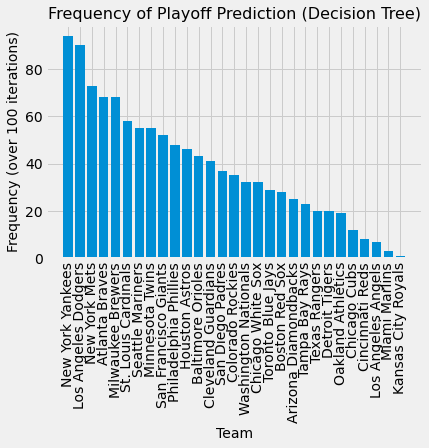

In [46]:
Team = standard_dectree.Team
FrequencyTree = standard_dectree.Frequency
plt.bar(Team, FrequencyTree)
plt.title('Frequency of Playoff Prediction (Decision Tree)', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Frequency (over 100 iterations)', fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Result
The result predicts that there are more teams that have iterations of being in the playoff according to this model, and the model has about 10 teams that has 45 or more iterations. The accuracy is lower at about 70% compared to the logistic regression model at 75-80%.

# 3. K-nearest neighbors algorithm (KNN)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import clear_output

In [48]:
knn = KNeighborsClassifier()
knn.fit(Xtrain, Ytrain)

KNeighborsClassifier()

In [49]:
predicted = knn.predict(Xtest)
actual = Ytest
print(metrics.accuracy_score(predicted, actual))


0.6518987341772152


In [50]:
outfield_kneighbor = Counter()
for iteration in range(100):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)   
    knn = KNeighborsClassifier()
    knn.fit(Xtrain, Ytrain)
    predictions_2022 = knn.predict(MLstandard2022)
    DF_predictions_2022 = pd.DataFrame({'2022 Teams':standard2022.Tm, 'Playoff Prediction':predictions_2022})
    playoff_teams_2022 = DF_predictions_2022.loc[DF_predictions_2022['Playoff Prediction'] == 1, '2022 Teams']
    outfield_kneighbor.update(list(playoff_teams_2022))


In [51]:
outfield_kneighbor

Counter({'Chicago White Sox': 37,
         'Colorado Rockies': 39,
         'New York Yankees': 50,
         'Atlanta Braves': 15,
         'Milwaukee Brewers': 42,
         'Philadelphia Phillies': 45,
         'St. Louis Cardinals': 32,
         'Toronto Blue Jays': 7,
         'Los Angeles Dodgers': 42,
         'Boston Red Sox': 12,
         'San Francisco Giants': 25,
         'Texas Rangers': 1,
         'Seattle Mariners': 3,
         'Chicago Cubs': 1,
         'Baltimore Orioles': 5,
         'San Diego Padres': 1})

In [52]:
outfield_kneighbor = pd.DataFrame({'Team':outfield_kneighbor.keys(), 
              'Frequency':outfield_kneighbor.values()}
            ).sort_values(by = 'Frequency', ascending = False)
outfield_kneighbor

,Team,Frequency
2,New York Yankees,50
5,Philadelphia Phillies,45
4,Milwaukee Brewers,42
8,Los Angeles Dodgers,42
1,Colorado Rockies,39
0,Chicago White Sox,37
6,St. Louis Cardinals,32
10,San Francisco Giants,25
3,Atlanta Braves,15
9,Boston Red Sox,12


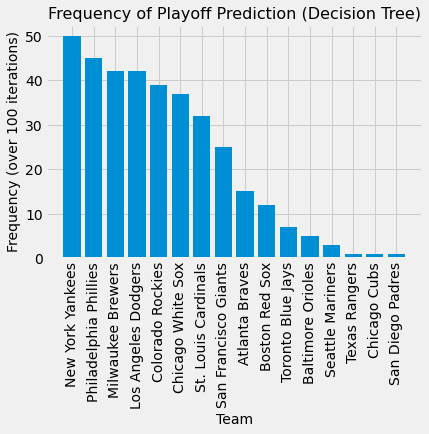

In [53]:
Team = outfield_kneighbor.Team
FrequencyTree = outfield_kneighbor.Frequency
plt.bar(Team, FrequencyTree)
plt.title('Frequency of Playoff Prediction (Decision Tree)', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Frequency (over 100 iterations)', fontsize=14)
plt.xticks(rotation=90)
plt.show()


# Result
The result predicts that there are more teams that have iterations of being in the playoff according to this model, and the model has about 10 teams that has 45 or more iterations. The accuracy is the lowest at about 65% compared to the logistic regression model at 75-80% and KNN at about 70%.

# 3. Random Forest Model

In [54]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

Average CV Score: 0.73


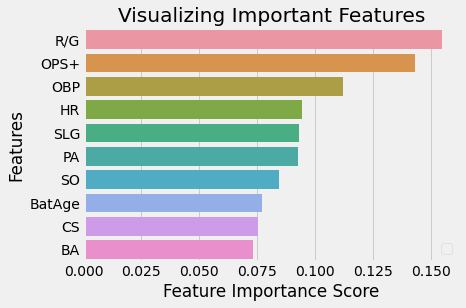

In [56]:
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(Xtrain, Ytrain)

feature_imp = pd.Series(forest.feature_importances_,index=Xtrain.columns).sort_values(ascending=False)
feature_imp

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(forest, Xtrain, Ytrain, scoring='accuracy', cv=cv, n_jobs=-1)
print("Average CV Score: " + str(round(np.mean(scores), 2)))
#Print out order of importance for features
sns.barplot(x=feature_imp, y=feature_imp.index)


# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [57]:
standard_RF = Counter()
for iteration in range(100):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y)   
    RF = RandomForestClassifier()
    RF.fit(Xtrain, Ytrain)
    predictions_2022 = RF.predict(MLstandard2022)
    DF_predictions_2022 = pd.DataFrame({'2022 Teams':standard2022.Tm, 'Playoff Prediction':predictions_2022})
    playoff_teams_2022 = DF_predictions_2022.loc[DF_predictions_2022['Playoff Prediction'] == 1, '2022 Teams']
    standard_RF.update(list(playoff_teams_2022))

In [58]:
standard_RF = pd.DataFrame({'Team':standard_RF.keys(), 
              'Frequency':standard_RF.values()}
            ).sort_values(by = 'Frequency', ascending = False)
standard_RF

,Team,Frequency
1,Los Angeles Dodgers,100
5,New York Yankees,100
4,New York Mets,95
7,St. Louis Cardinals,70
2,Milwaukee Brewers,59
0,Atlanta Braves,48
3,Minnesota Twins,48
6,Philadelphia Phillies,31
8,Toronto Blue Jays,22
10,San Francisco Giants,5


In [59]:
predicted = RF.predict(Xtest)
actual = Ytest
print(metrics.accuracy_score(predicted, actual))

0.7468354430379747


# Result
The result predicts that there are more teams that have iterations of being in the playoff according to this model, and the model has about 14 teams that iterations of being predicted to be in the playoff. The accuracy is still around 70-75% which leads me to think about this:
## I need to do a better job a feature selection and should go through the process before running my data through these ML models

# 3. Random Forest Model 2

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read in test data for 2022 season
standard = pd.read_csv("standardbatting.csv", float_precision = 'round_trip')

In [ ]:
standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     651 non-null    int64  
 1   Tm       651 non-null    object 
 2   #Bat     651 non-null    int64  
 3   BatAge   651 non-null    float64
 4   R/G      651 non-null    float64
 5   G        651 non-null    int64  
 6   PA       651 non-null    int64  
 7   AB       651 non-null    int64  
 8   R        651 non-null    int64  
 9   H        651 non-null    int64  
 10  2B       651 non-null    int64  
 11  3B       651 non-null    int64  
 12  HR       651 non-null    int64  
 13  RBI      651 non-null    int64  
 14  SB       651 non-null    int64  
 15  CS       651 non-null    int64  
 16  BB       651 non-null    int64  
 17  SO       651 non-null    int64  
 18  BA       651 non-null    float64
 19  OBP      651 non-null    float64
 20  SLG      651 non-null    float64
 21  OPS      651 non

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_nostr = standard.drop(['Tm', 'Year'], axis = 1)

#Standardize data
cols = [name for name in standard_nostr.columns]
target = standard_nostr['Playoff']



scale = StandardScaler()
standard_nostr = pd.DataFrame(scale.fit_transform(standard_nostr[cols]))
standard_nostr['Playoff'] = target
standard_nostr = standard_nostr.drop(15, axis = 1)
standard_nostr.columns = cols

#Make copy of standardize data frame
standard_copy = standard_nostr.copy()

In [ ]:
#Read in test data for 2022 season
test = pd.read_csv("MLB2022.txt", float_precision = 'round_trip')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tm      30 non-null     object 
 1   #Bat    30 non-null     int64  
 2   BatAge  30 non-null     float64
 3   R/G     30 non-null     float64
 4   G       30 non-null     int64  
 5   PA      30 non-null     int64  
 6   AB      30 non-null     int64  
 7   R       30 non-null     int64  
 8   H       30 non-null     int64  
 9   2B      30 non-null     int64  
 10  3B      30 non-null     int64  
 11  HR      30 non-null     int64  
 12  RBI     30 non-null     int64  
 13  SB      30 non-null     int64  
 14  CS      30 non-null     int64  
 15  BB      30 non-null     int64  
 16  SO      30 non-null     int64  
 17  BA      30 non-null     float64
 18  OBP     30 non-null     float64
 19  SLG     30 non-null     float64
 20  OPS     30 non-null     float64
 21  OPS+    30 non-null     int64  
 22  TB  

In [ ]:
test1 = test.drop(['Tm','OBP','OPS+','OPS', 'SLG','SB','CS','BB','BA','TB','GDP','HBP','SH','SF','IBB','LOB'], axis = 1)
test1.info()
test1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #Bat    30 non-null     int64  
 1   BatAge  30 non-null     float64
 2   R/G     30 non-null     float64
 3   G       30 non-null     int64  
 4   PA      30 non-null     int64  
 5   AB      30 non-null     int64  
 6   R       30 non-null     int64  
 7   H       30 non-null     int64  
 8   2B      30 non-null     int64  
 9   3B      30 non-null     int64  
 10  HR      30 non-null     int64  
 11  RBI     30 non-null     int64  
 12  SO      30 non-null     int64  
dtypes: float64(2), int64(11)
memory usage: 3.2 KB


,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SO
0,51,26.9,4.24,106,3943,3495,449,791,163,18,121,423,897
1,46,27.9,4.77,109,4091,3712,520,928,202,7,166,494,1011
2,52,27.4,4.23,107,4027,3611,453,854,199,14,109,427,938
3,47,28.8,4.48,109,4139,3748,488,947,245,9,105,466,914
4,53,28.3,4.14,106,4017,3584,439,868,179,20,104,411,940
5,40,29.2,4.28,107,4046,3710,458,951,182,8,92,436,832
6,55,30.1,4.31,106,3901,3500,457,838,165,10,102,438,933
7,46,26.0,4.36,107,4044,3645,467,915,196,19,85,444,753
8,37,29.5,4.45,110,4177,3778,490,988,200,25,99,467,864
9,47,28.5,3.25,109,3915,3586,354,816,155,17,65,339,931


In [ ]:
cols = [name for name in test1.columns]
#target = test['playoff_status']

scale = StandardScaler()
test1 = pd.DataFrame(scale.fit_transform(test1[cols]))
#test['playoff_status'] = target
test1.columns = cols

In [ ]:
test_copy = test1.copy()
test_copy

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SO
0,0.338178,-1.323650,-0.174893,-1.507557,-1.148903,-1.908329,-0.322560,-1.594144,-0.714530,0.674210,0.189451,-0.418646,-0.018278
1,-0.676355,-0.471515,0.950938,1.206045,0.688680,1.363523,1.082455,0.863445,1.067986,-1.312301,1.929308,0.996776,1.767788
2,0.541084,-0.897582,-0.196135,-0.603023,-0.105951,-0.159321,-0.243404,-0.464012,0.930869,-0.048158,-0.274511,-0.338904,0.624079
3,-0.473449,0.295407,0.334917,1.206045,1.284653,1.906319,0.449209,1.204278,3.033324,-0.951117,-0.429165,0.438581,0.248065
4,0.743991,-0.130661,-0.387314,-1.507557,-0.230112,-0.566417,-0.520449,-0.212871,0.016759,1.035393,-0.467828,-0.657872,0.655413
5,-1.893795,0.636261,-0.089925,-0.603023,0.129955,1.333368,-0.144459,1.276033,0.153875,-1.131709,-0.931790,-0.159484,-1.036650
6,1.149804,1.403183,-0.026199,-1.507557,-1.670380,-1.832941,-0.164248,-0.751030,-0.623119,-0.770525,-0.545155,-0.119613,0.545743
7,-0.676355,-2.090572,0.080012,-0.603023,0.105123,0.353320,0.033641,0.630243,0.793753,0.854802,-1.202434,0.000000,-2.274362
8,-2.502515,0.891901,0.271191,2.110579,1.756465,2.358649,0.488787,1.939761,0.976575,1.938353,-0.661146,0.458517,-0.535298
9,-0.473449,0.039766,-2.277862,1.206045,-1.496554,-0.536262,-2.202510,-1.145679,-1.080174,0.493618,-1.975704,-2.093229,0.514408


# Feature Selection

In [ ]:
#Look at correlation heat map to remove variables that are multi-collinear
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = standard_nostr.columns
vif_data['VIF'] = [variance_inflation_factor(standard_nostr.values, i ) for i in range(len(standard_nostr.columns))]

vif_data

,feature,VIF
0,#Bat,1.377477e+00
1,BatAge,1.391392e+00
2,R/G,3.573906e+02
3,G,9.088099e+02
4,PA,3.653106e+05
5,AB,2.907693e+05
6,R,1.451919e+03
7,H,1.202372e+06
8,2B,6.123321e+04
9,3B,9.671175e+03


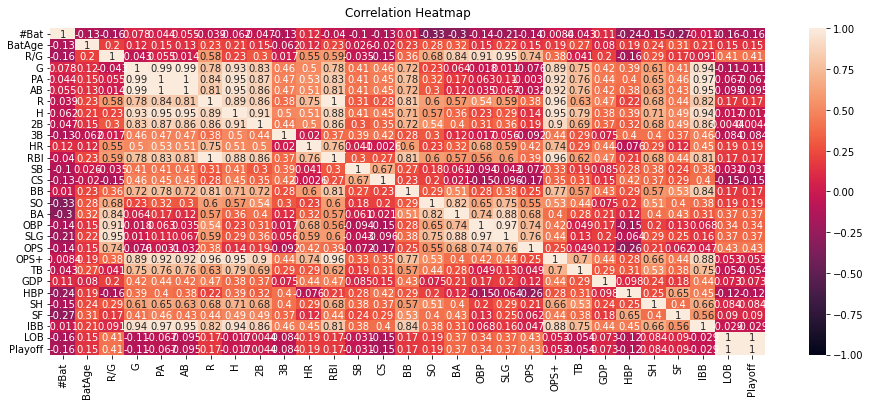

In [ ]:
#Correlation Matrix:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(standard_nostr.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Observation:

AB and G

PA and G

2B and H

G and PA

SLG and OBP

H and R

OPS+ and G, PA, AB,R,H,2B,RBI

In [ ]:
test1 = test.drop(['Tm','OBP','G', 'SLG','H','AB', 'OPS+'], axis = 1)
test1.info()
test1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #Bat    30 non-null     int64  
 1   BatAge  30 non-null     float64
 2   R/G     30 non-null     float64
 3   PA      30 non-null     int64  
 4   R       30 non-null     int64  
 5   2B      30 non-null     int64  
 6   3B      30 non-null     int64  
 7   HR      30 non-null     int64  
 8   RBI     30 non-null     int64  
 9   SB      30 non-null     int64  
 10  CS      30 non-null     int64  
 11  BB      30 non-null     int64  
 12  SO      30 non-null     int64  
 13  BA      30 non-null     float64
 14  OPS     30 non-null     float64
 15  TB      30 non-null     int64  
 16  GDP     30 non-null     int64  
 17  HBP     30 non-null     int64  
 18  SH      30 non-null     int64  
 19  SF      30 non-null     int64  
 20  IBB     30 non-null     int64  
 21  LOB     30 non-null     int64  
dtypes: f

,#Bat,BatAge,R/G,PA,R,2B,3B,HR,RBI,SB,...,SO,BA,OPS,TB,GDP,HBP,SH,SF,IBB,LOB
0,51,26.9,4.24,3943,449,163,18,121,423,49,...,897,0.226,0.691,1353,58,33,20,26,12,696
1,46,27.9,4.77,4091,520,202,7,166,494,60,...,1011,0.250,0.756,1642,63,47,0,23,6,701
2,52,27.4,4.23,4027,453,199,14,109,427,69,...,938,0.236,0.695,1408,64,65,10,30,8,739
3,47,28.8,4.48,4139,488,245,9,105,466,39,...,914,0.253,0.720,1525,70,40,9,34,15,752
4,53,28.3,4.14,4017,439,179,20,104,411,69,...,940,0.242,0.707,1399,94,57,8,23,11,746
5,40,29.2,4.28,4046,458,182,8,92,436,39,...,832,0.256,0.694,1425,80,47,14,22,7,733
6,55,30.1,4.31,3901,457,165,10,102,438,43,...,933,0.239,0.688,1329,88,66,7,25,2,638
7,46,26.0,4.36,4044,467,196,19,85,444,67,...,753,0.251,0.699,1404,73,45,13,36,13,738
8,37,29.5,4.45,4177,490,200,25,99,467,30,...,864,0.262,0.730,1535,100,46,7,30,4,781
9,47,28.5,3.25,3915,354,155,17,65,339,28,...,931,0.228,0.619,1200,76,38,5,28,3,679


In [ ]:
train_copy = standard_nostr.copy()

In [ ]:
#Compute VIF Scores again
vif_data = pd.DataFrame()
vif_data['feature'] = standard_nostr.columns
vif_data['VIF'] = [variance_inflation_factor(standard_nostr.values, i ) for i in range(len(standard_nostr.columns))]

vif_data

,feature,VIF
0,#Bat,1.377477e+00
1,BatAge,1.391392e+00
2,R/G,3.573906e+02
3,G,9.088099e+02
4,PA,3.653106e+05
5,AB,2.907693e+05
6,R,1.451919e+03
7,H,1.202372e+06
8,2B,6.123321e+04
9,3B,9.671175e+03


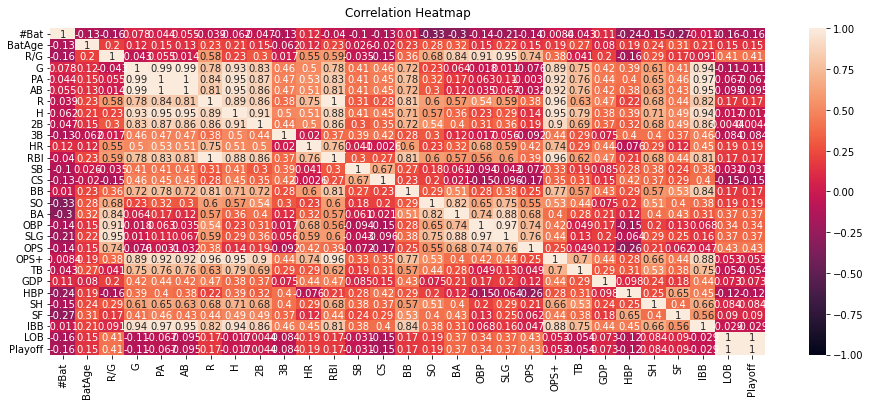

In [ ]:
#New heatmap
#Correlation Matrix:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(standard_nostr.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
#Train logistic regression model
from sklearn.model_selection import train_test_split

In [ ]:
x_train = standard_nostr.drop('Playoff', axis = 1)
y_train = standard_nostr['Playoff'] 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


#Create instance of logistic regression model
lgr1 = LogisticRegression(solver = 'liblinear', )

#Train model on training data
lgr1.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
#Print out coefficients for each variable in model - Note: they are the logit coefficients
coef_dict = {}

for index in range(len(standard_nostr.columns) - 1):
    coef_dict[standard_nostr.columns[index]] = round(float(lgr1.coef_.reshape(28, 1)[index], ), 4)

coef_dict['intercept'] = round(float(lgr1.intercept_.reshape(1,1)), 4)
coef_dict

{'#Bat': -0.1126,
 '2B': -0.0973,
 '3B': -0.0219,
 'AB': -0.0525,
 'BA': 0.081,
 'BB': 0.113,
 'BatAge': 0.0539,
 'CS': -0.0829,
 'G': -0.0152,
 'GDP': 0.031,
 'H': -0.0424,
 'HBP': -0.0387,
 'HR': 0.0184,
 'IBB': -0.043,
 'LOB': 4.3137,
 'OBP': -0.0267,
 'OPS': 0.2537,
 'OPS+': -0.0345,
 'PA': -0.0344,
 'R': 0.0926,
 'R/G': 0.1386,
 'RBI': 0.0819,
 'SB': 0.0704,
 'SF': 0.0474,
 'SH': 0.0359,
 'SLG': 0.0132,
 'SO': -0.104,
 'TB': -0.0239,
 'intercept': -2.0128}

In [ ]:

#Make predictions on x_test
preds = lgr1.predict(test1)
preds.shape

#Get probabilities of the predicted outcome at each index
preds_probs = lgr1.predict_proba(test1)
preds_probs
#first value is the probability of outcome being zero, second is p(x) of being 1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- AB
- G
- H
- OBP
- OPS+
- ...

  warnings.warn(message, FutureWarning)


ValueError: ignored